In [1]:
import os
import time
import re
import numpy as np
import math
from os import listdir
from os.path import isfile, join

from PIL import Image

from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec

from utils import *

56


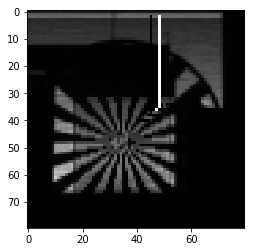

In [56]:
#path = 'e:\\Data\\super\\new\\'
path = 'z:\\tomo\\ershov\\super\\star\\tb2zcoarse22\\4_scan_vertical\\dark\\'
path_out = 'z:\\tomo\\ershov\\super\\star\\tb2zcoarse22\\'

#image = np.array(Image.open(path + '317961-medipix4-001.tif'))
images = read_images_from_directory(path)

print(len(images))

# central image
image = images[27]
plt.imshow(image, vmax=20000, cmap='gray')


Flat-corrected


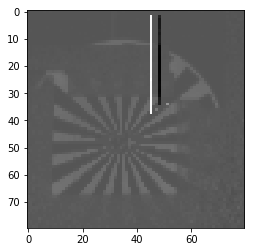

In [57]:
flat = np.array(Image.open(path_out + 'flat.tif')) 
image = np.log((flat.astype(float)  + 0.001) / (image.astype(float)  + 0.001))

print('Flat-corrected')
plt.imshow(image, cmap='gray')
plt.show()

Cropped


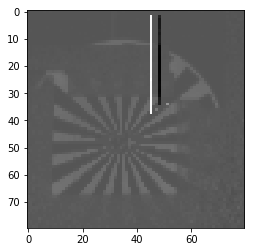

In [54]:
# Crop coordinates
x0 = 0#18
y0 = 0#38

# Crop dimensions
w = 80#34
h = 80#24

# Crop
print('Cropped')
im = image[y0:y0+h, x0:x0+w]
plt.imshow(im, cmap='gray')

im_res = Image.fromarray(im)
im_res.save(path_out + 'cropped.tif')


## Stack images

56


In [52]:
num_shifts = len(images) - 1

res = []

# for all vertical lines
for n in tqdm(range(h)):
    for i in range(num_shifts):
    
        # vertical
        im = images[i][y0+n:y0+n+1, x0:x0+w]
        f = flat[y0+n:y0+n+1, x0:x0+w]
        
        im = np.log((f.astype(float)  + 0.001) / (im.astype(float)  + 0.001))
        
        # horizontal
        #im = images[i][y0+n:y0+n+1, x0:x0+w]
        res.append(im)

print(len(res))

print(res[0].shape)

100%|████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 2162.47it/s]


4400
(1, 80)


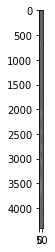

In [53]:
combined= np.vstack(res)

plt.imshow(combined, cmap='gray')
plt.show()    
  
im_res = Image.fromarray(combined)
im_res.save(path_out + 'combined_vert.tif')

## Stripes processing: Old

In [9]:
shift = 1
step = 17

num_shifts = 10

num_stripes = 12

res = []

use_flat = False

for i in tqdm(range(num_shifts)):
      
    if use_flat:
        raw = np.array(Image.open(path + 'rad_'+str(i).zfill(2) +'.tif'))    
        flat = np.array(Image.open(path + 'flat_'+str(i).zfill(2) +'.tif')) 
        image = np.log((flat.astype(float)  + 0.001) / (raw.astype(float)  + 0.001))
    else:
        image = np.array(Image.open(path + 'rad_'+str(i).zfill(2) +'.tif'))
         
    stripes = []
    
    for n in range(num_stripes):
        im = image[y0 + shift*i+n*step:y0+h + shift*i+n*step, x0:x0+w]
        stripes.append(im)
        
    res.append(stripes)

print('Finished!')



100%|█████████████████████████████████████████████████████████████████████████████████| 55/55 [00:00<00:00, 118.96it/s]


Finished!


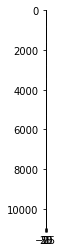

In [10]:
all_res = []

for s in range(num_stripes):
    for i in range(num_shifts):
        all_res.append(res[i][s])
        
im = np.vstack(all_res)

plt.imshow(im, cmap='gray')
plt.show()    
  
im_res = Image.fromarray(im)
im_res.save(path + 'combined.tif')

In [75]:
1000 / 600

1.6666666666666667

In [110]:
10 / 13

0.7692307692307693

In [111]:
60 / 89

0.6741573033707865

In [112]:
10 / (0.67*3)

4.975124378109452

In [136]:
1 / 0.675

1.4814814814814814

In [137]:
v = np.arange(1,5,1)

In [138]:
v

array([1, 2, 3, 4])

In [11]:
55*24

1320